# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
!jupyter nbconvert --to html Project.ipynb

[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'html' matched no files
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 285, in launch_instance
    return super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 423, in start
    self.convert_notebooks()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 585, in convert_notebooks
    raise ValueError(
ValueError: Please specify an output format with '--to <format>'.
The following formats are available: ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'rst', 'script', 'slides', 'webpdf']


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
# read the data
df = pd.read_csv('/content/MyDrive/MyDrive/Python/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
df.shape

(1898, 9)

#### Observations:
The data set has 1,898 rows and 9 columns

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Of the data types, 4 are integers, 1 is a float, and 4 are objects. The rating column has the wrong data type being that all ratings are numeric. Data type should be an integer.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

Observations:
There are no missing values in the data frame so nothing needs to be changed.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
Of the 1,898 orders, the average order takes 27.37 minutes to prepare, the fastest order took 20 minutes to prepare and the slowest order took 35 minutes to prepare.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].value_counts(dropna=False)

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There were 736 orders that were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

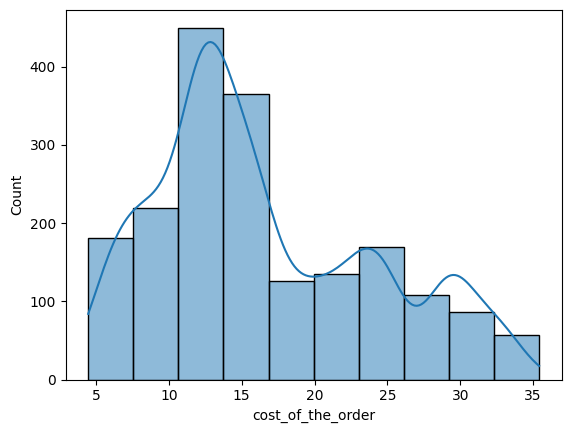

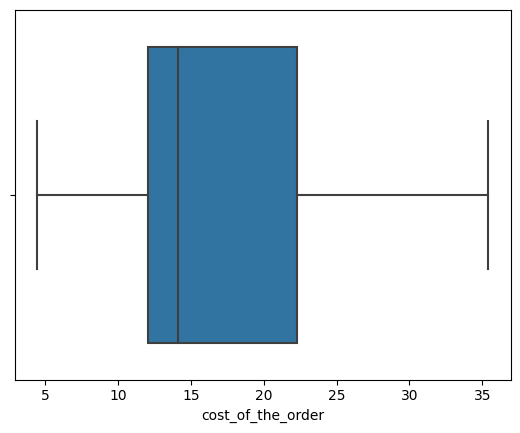

In [ ]:
sns.histplot(data = df, x='cost_of_the_order', bins = 10, stat = 'count', kde = True);
plt.show()
sns.boxplot(data = df, x='cost_of_the_order')
plt.show();


# Observations on cost of the orders:
The majority of the orders cost between about 12 and 22 dollars.

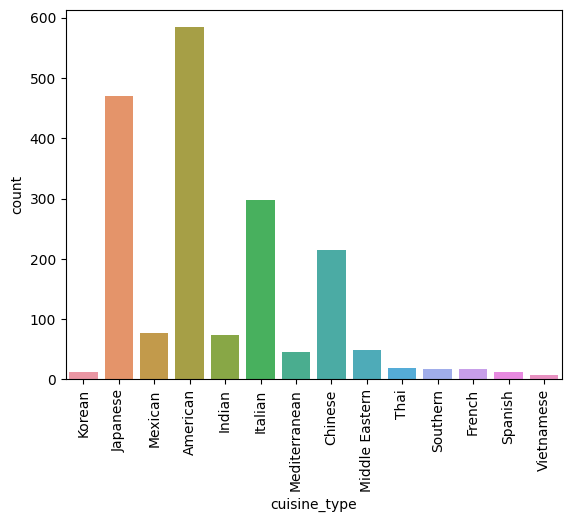

In [ ]:
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

# Observations on Cuisine Type

The most popular cuisine is American followed by Japanese

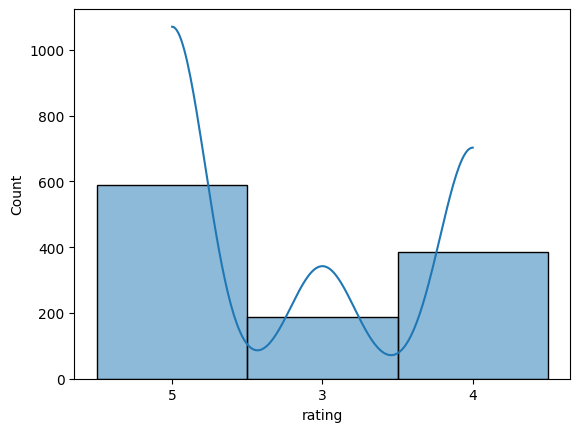

In [ ]:
top5df= df[df['rating']!= 'Not given']
sns.histplot(data = top5df, x='rating',bins = 4,stat = 'count',kde = True)
plt.show()


# Observations on Rating

The majority of the rated restaurants recieved a 5 star review.

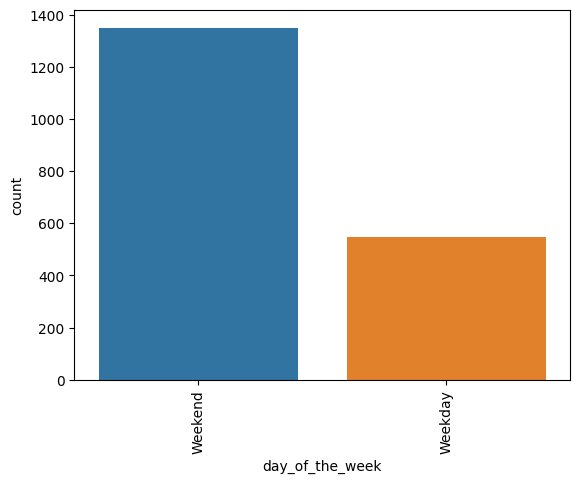

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

# Observations on days of the week

The most popular time for the consumers to order food was during the weekend. Weekend orders more than doubled wekday orders.

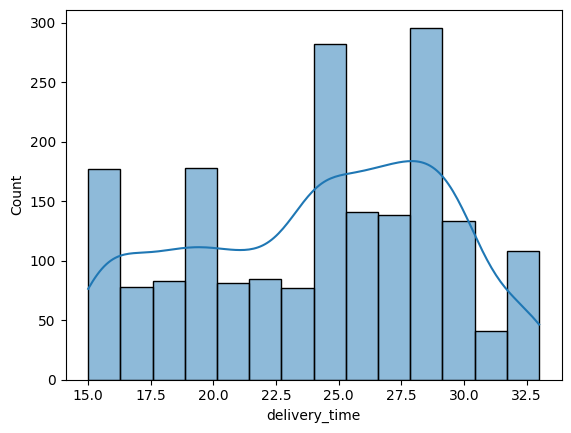

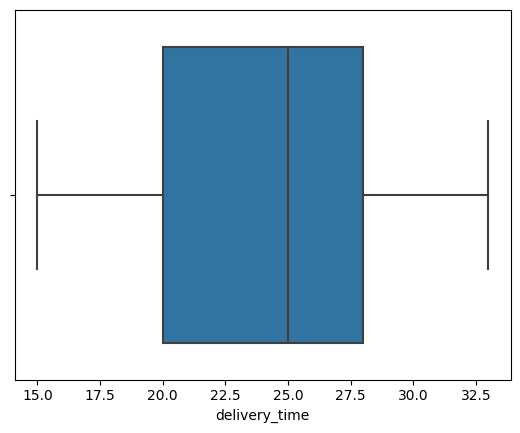

In [ ]:
sns.histplot(data = df, x='delivery_time', stat = 'count',kde = True,)
plt.show()
sns.boxplot(data = df, x='delivery_time')
plt.show();

# Observations on delivery time

50% of orders were delivered between 20 and 28 minutes. The average delivery time is 25 minutes.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df[['restaurant_name','order_id']].groupby('restaurant_name').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 most popular restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm having more orders than any other restaurant. Shake Shack with 219, Meatball Shop with 132, BR Sushi with 119, BR Fried Chicken with 96, and Parm with 68 processing more order than the others.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
df[df['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(5)

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,415,415,415
Japanese,335,335,335,335,335,335,335,335
Italian,207,207,207,207,207,207,207,207
Chinese,163,163,163,163,163,163,163,163
Mexican,53,53,53,53,53,53,53,53


#### Observations:
American cuisine is the most popular on weekends with 415 orders .

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
total_observations = df['cost_of_the_order'].count()
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count()
percentage_above20 = round((orders_above20/total_observations)*100,2)
percentage_above20

29.24

#### Observations:
29.24% of the total orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
avg_del_time = round(df[['delivery_time']].agg('mean'),2)
print(avg_del_time)

delivery_time    24.16
dtype: float64


#### Observations:
The average delivery time is 24.16 minutes once orders are prepared.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df[['order_id','customer_id']].groupby('customer_id').count().sort_values(by = 'order_id',axis = 0, ascending=False).head(10)

,order_id
customer_id,
52832,13
47440,10
83287,9
250494,8
65009,7
82041,7
259341,7
276192,7
60052,6


#### Observations:
After identifying our top 10 most frequent customers via customer_id, 4 customers are tied for 4th place with 7 visits, and 2 customers are tied for 9th with 6 visits.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-15-f1695d769c6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1);


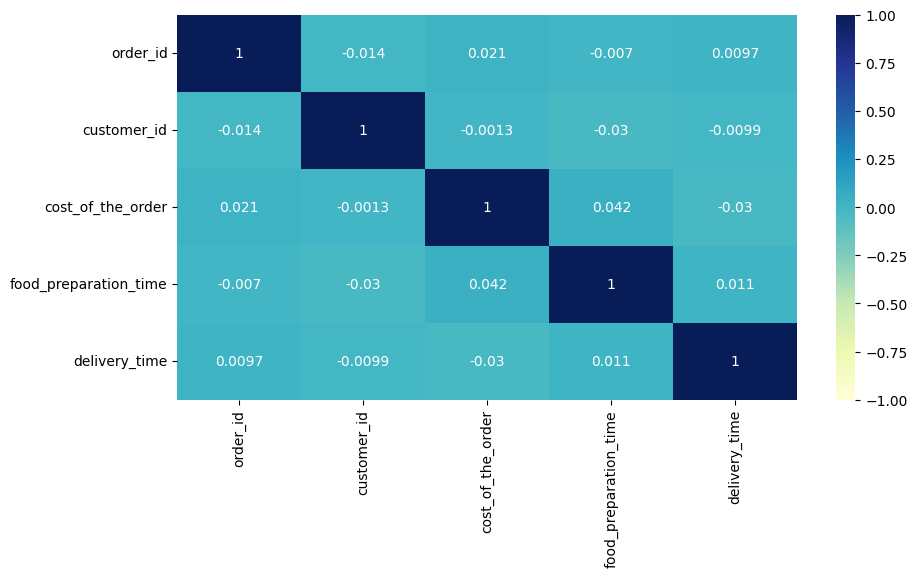

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',vmin=-1,vmax=1);

# Observation on Heat Map

Based on the data, the correlation between all of the variables are very weak.

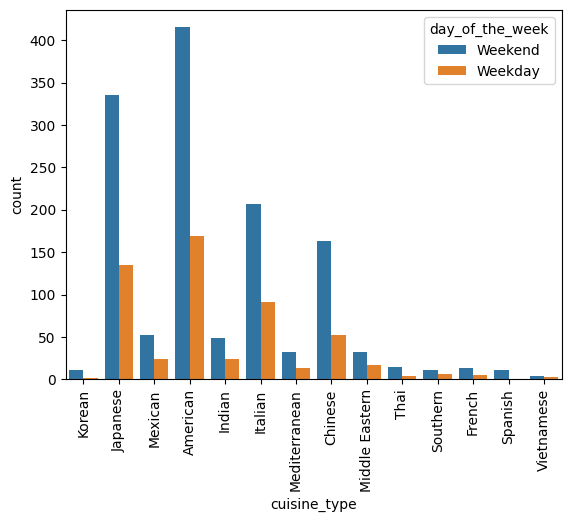

In [ ]:
sns.countplot(data=df,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()

# Observations on Orders of cuisine per day of the week

American cuisine has the most orders on weekends and weekdays. Our chart shows that the demand is higher during the weekends but the popularity of each cuisine is not affected by the day of the week.

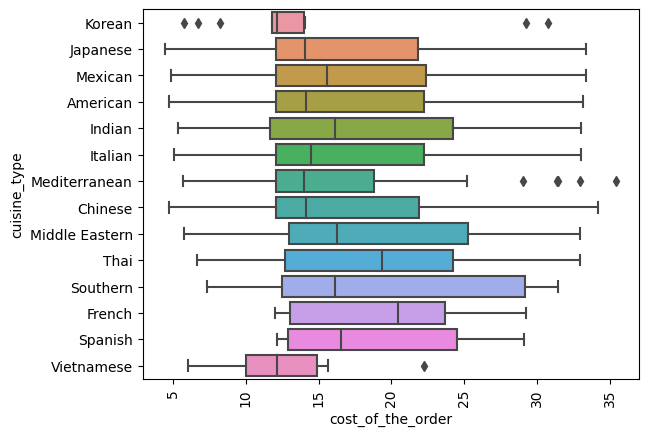

In [ ]:
sns.boxplot(data=df,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();

# Observation of cost to cuisine type

Each cuisine has a fairly different range of cost with there being outliers in Korean, Mediterranean, and Vietnamese.

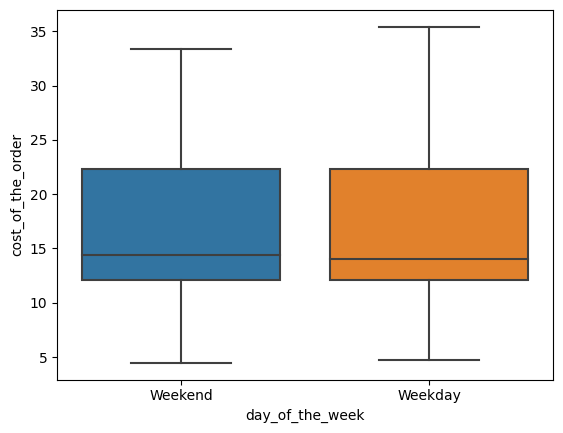

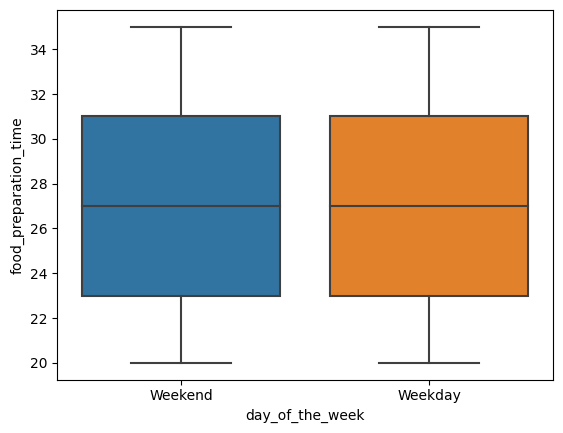

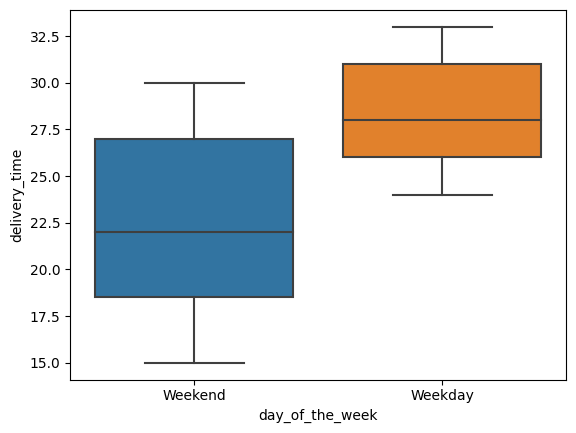

In [ ]:
sns.boxplot(data=df,x='day_of_the_week',y='cost_of_the_order')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

# Observations on day of the week versus different variables

Cost of the orders are not affected by day of the week, nor is food preparation time. The delivery time is affected by the day of the week being that volume and demand are lesser, available delivery drivers are fewer. The average delivery during the weekend is about 22.5 minutes where delivery during the weekday is about 28 minutes.

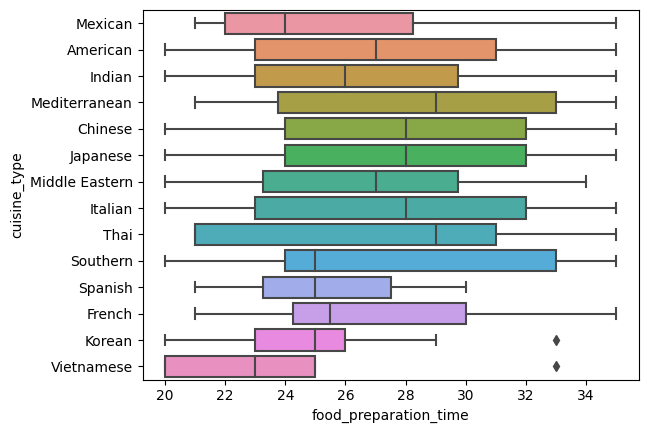

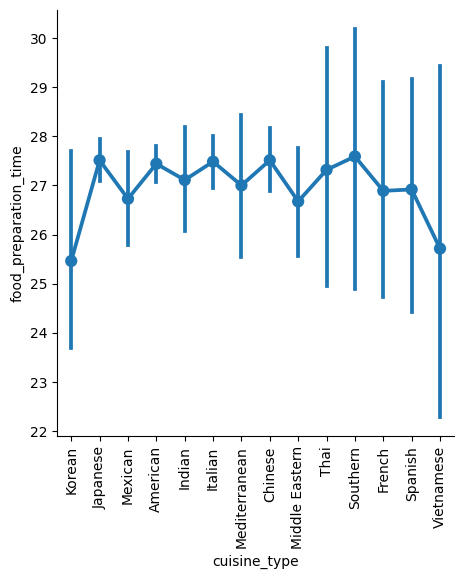

In [ ]:
sns.boxplot(data=top5df,x='food_preparation_time',y='cuisine_type')
plt.show()
sns.catplot(data = df, x = 'cuisine_type',y = 'food_preparation_time',kind = 'point')
plt.xticks(rotation=90)
plt.show();

# Observation of Cuisine type & Food preparation

Most cuisine types have more or less the same average preparation time although some have a larger spread.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
df2 = df[['restaurant_name','rating']][df['rating']!= 'Not given'].groupby('restaurant_name').mean()> 4
df2.reset_index(inplace=True)
df3 = df[['restaurant_name','rating']][df['rating']!= 'Not given'].groupby('restaurant_name').count()> 50
df3.reset_index(inplace=True)
qualified_restaurants = pd.merge(df3[df3['rating']== True], df2[df2['rating']== True],on ='restaurant_name')
qualified_restaurants

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,True,True
1,Blue Ribbon Sushi,True,True
2,Shake Shack,True,True
3,The Meatball Shop,True,True


#### Observations:
Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop all have more than 50 ratings of a 4 or better meaning they qualify for the promotion.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
revenue = 0
income = 0
# Create a Pandas series of the cost of order column
cost = pd.Series(df['cost_of_the_order'])
# Loop through the series calculating the individual income component and adding it to the revenue variable
for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income

In [ ]:
print('Net revenue generated is: ',round(revenue,2),'given no commission is charged for orders below $5')

Net revenue generated is:  6166.3 given no commissionm is charged for orders below $5


#### Observations:
FoodHub has collected 6,166.30 dollars from commissions on orders 5 dollars or more.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
total_observations = df['total_prep_time'].count()
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count()

percent_above60 = round((ordertime_above60/total_observations)*100,2)
percent_above60

10.54

#### Observations:

10.54% of the total orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
avr_del_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
avr_del_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

#### Observations:

The average delivery time on weekends is about 6 minutes faster than on weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
1. With rating concentrated around the high score of 5, its possible that mostly the very satisfied customers rate the service wheres dissatisifed customers wouldn't have a rating. However alot of data is lost in the unrated orders which makes me think about an incentive for every customer to rate their experience.

2. There is a consistent popularity of the cuisines regardless of the day of the week although demand is significantly higher over the weekends.

3. Preparation time is consistent when compared to delivery time, meaning delivery time is an intrical part of the rating system.

4. There is a tie of 4 customers in 5th place given the reward criteria. It requires further analysis to determine how the tie is broken.

### Recommendations:

1. Improve the customers' response rating their orders, that is, reduce the rating 'Not given' on the orders. If possible entice them with a reward (discount/free appetizer) or follow up to know why they opt not to rate the service.

2. Given the consistent popularity of the cuisines across the days of the week, better marketing can be focused on the weekday to boost sales. Restaurants if they have not already, should offer family meals to accomodate the working class where this is only done during weekdays when leisure time is not as regular.

3. To improve on total order time review on how to bring down delivery time can be assessed to improve on overall service. A wonder is whether the high delivery time is the cause of low orders during the weekdays. A survey of whether customers avoid ordering on weekdays because they anticipate a longer processing time for their order.

4. On promotional offers the organization will have to consider a tie-breaker for cases where customers have the same score. A decision will be required to either reward all of them or decide whats factors can distinguish the customers such as the amount spent by each one of the customers in a tie.

---